# Machine Learning: Assignment 5 
## SVM plus Other Classification Method (max. 10p)

The dataset for the exercise is "Date Fruit Datasets" file you can find from [Date_Fruit_Datasets.xlsx](data/Date_Fruit_Datasets.xlsx), which contains 898 rows and 34 columns of data about dates and a column telling the species of dates. 

There are **seven** (**7**) date fruit species in the dataset, so this is kind of **multi-class classification problem**.

More information about the data and related research: [https://www.muratkoklu.com/datasets/](https://www.muratkoklu.com/datasets/).


In [17]:
student_name = 'Fadi Helal'
student_id = '2312951'

## Assignment 5.1
### Topic: Data Preprocessing (2 points)
The dataset has a class variable (*target*) in the last column.

Let's do the following preprocessing steps with the dataset:

1. Load the data into the `DataFrame`.
2. Name the columns of the `DataFrame` according to the material.
3. Preprocess the material
   * Optimize the data input to the machine learning model
   * You can remove "unnecessary features" at your discretion
   * Handling of abnormal (outliers) or empty data values
   * Remember that all categories should be numeric
4. Scale column values by normalizing them.

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Loading the dataset
file_path = './data/Date_Fruit_Datasets.xlsx' 
df = pd.read_excel(file_path)

# Converting 'Class' column to numeric values
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Handling missing values (if any).
df.dropna(inplace=True)

# Handling outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove unnecessary features - Specify them based on your analysis
unnecessary_features = ['ECCENTRICITY', 'ASPECT_RATIO', 'COMPACTNESS','KurtosisRR', 'SkewRR', 'StdDevRG', 'StdDevRB','EXTENT','StdDevRR'] # I tested the features by getting thei importance level
df.drop(unnecessary_features, axis=1, inplace=True)

# Scaling the features (excluding the target variable 'Class')
scaler = MinMaxScaler()
feature_columns = df.columns[df.columns != 'Class']  # All columns except the target variable
df[feature_columns] = scaler.fit_transform(df[feature_columns])


# I used feature_importances_ to get their importance and remove the once that are less important after Shapefactor 4

          Feature  Importance
3      MINOR_AXIS    0.129605
6     CONVEX_AREA    0.072469
8   SHAPEFACTOR_1    0.069416
4         EQDIASQ    0.064832
1       PERIMETER    0.056281
0            AREA    0.051987
12         MeanRR    0.046632
16         SkewRB    0.043070
22     ALLdaub4RR    0.042891
19      EntropyRR    0.039109
21      EntropyRB    0.035416
7       ROUNDNESS    0.034747
2      MAJOR_AXIS    0.034159
20      EntropyRG    0.031333
15         SkewRG    0.028118
14         MeanRB    0.027239
13         MeanRG    0.026741
17     KurtosisRG    0.026342
18     KurtosisRB    0.026303
24     ALLdaub4RB    0.023454
23     ALLdaub4RG    0.023342
5        SOLIDITY    0.022659
11  SHAPEFACTOR_4    0.016931
9   SHAPEFACTOR_2    0.015033
10  SHAPEFACTOR_3    0.011892


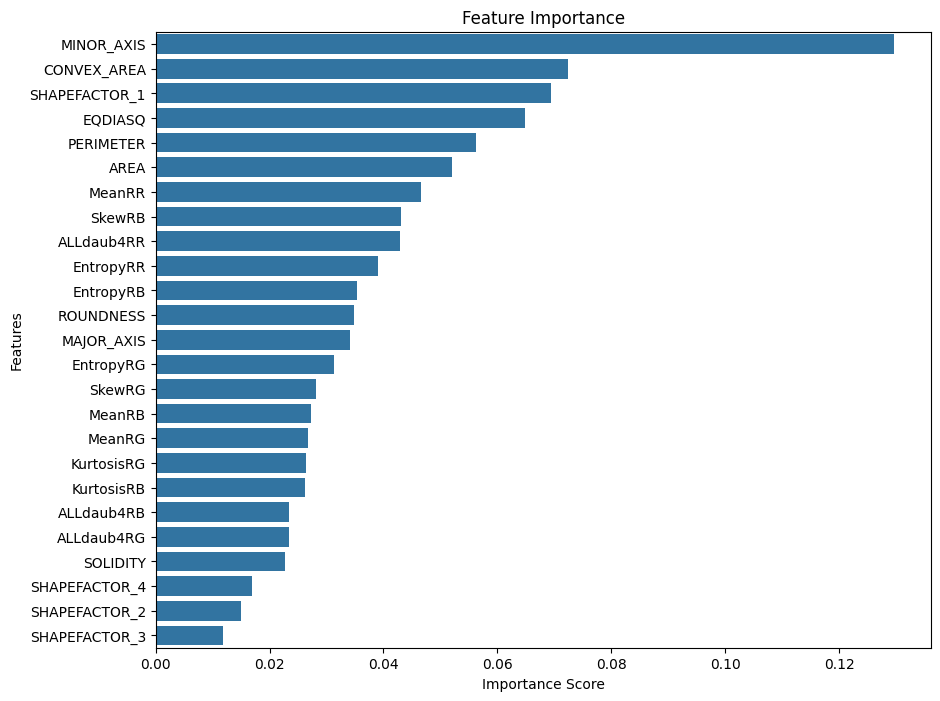

In [100]:

from sklearn.ensemble import RandomForestClassifier
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Initializing the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf.fit(X, y)
# Getting feature importances
importances = rf.feature_importances_

# Converting the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting the DataFrame to see the most important features at the top
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Displaying the feature importance scores
print(feature_importance_df)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


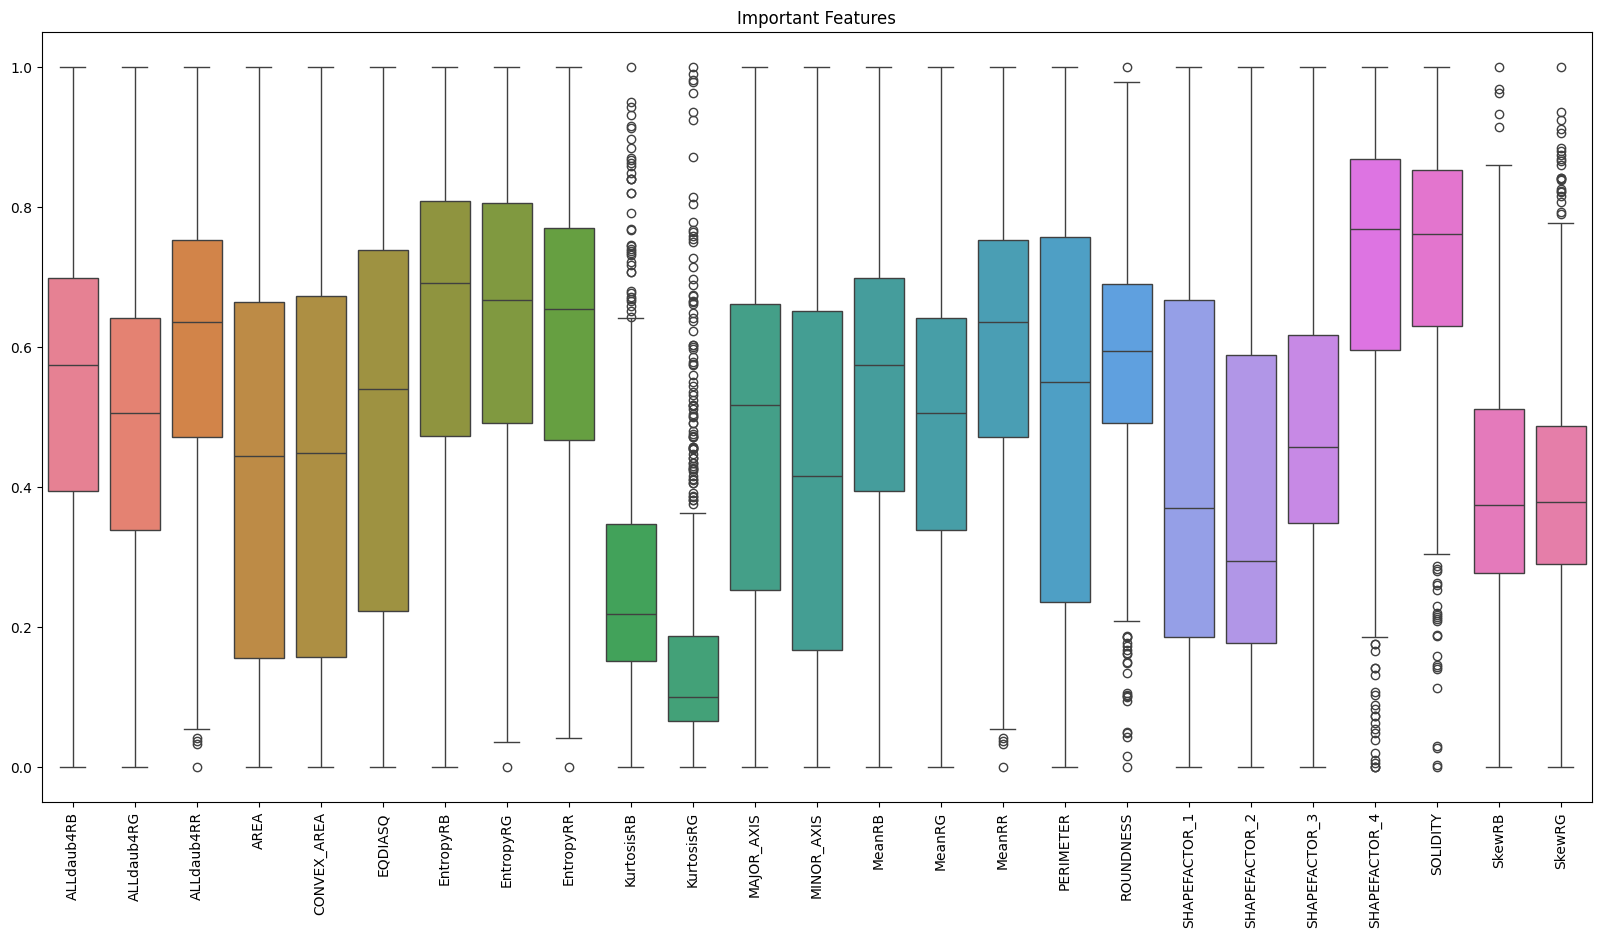

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Excluding the class label for normalization
features = df.columns.difference(['Class'])

# Normalizing the features to have a comparable scale
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Plotting all normalized features using a box plot
plt.figure(figsize=(20, 10))  # You may need to adjust the figure size depending on the number of features
sns.boxplot(data=df_normalized)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Important Features')
plt.show()

In [91]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The DataFrame should be in the df variable.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'EQDIASQ', 'SOLIDITY',
       'CONVEX_AREA', 'ROUNDNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'SkewRG', 'SkewRB', 'KurtosisRG', 'KurtosisRB', 'EntropyRR',
       'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB',
       'Class'],
      dtype='object')
First row by position: AREA             0.776520
PERIMETER        0.778406
MAJOR_AXIS       0.665425
MINOR_AXIS       0.796462
EQDIASQ          0.830914
SOLIDITY         0.926027
CONVEX_AREA      0.774414
ROUNDNESS        0.841289
SHAPEFACTOR_1    0.111111
SHAPEFACTOR_2    0.176471
SHAPEFACTOR_3    0.760939
SHAPEFACTOR_4    0.712195
MeanRR           0.671310
MeanRG           0.544852
MeanRB           0.475705
SkewRG           0.354294
SkewRB           0.605275
KurtosisRG       0.105137
KurtosisRB       0.489101
EntropyRR        0.295951
EntropyRG        0.318519
EntropyRB        0.41

## Assignment 5.2: Training and Testing Data (2 points)

Split the data into training and testing data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the `scikit-learn` library.
Put *75%* of the data in training data.

1. Save the training data and its class variable to the variables `X_train`, `y_train`,
2. Save the test data to the variables `X_test`, `y_test`.

If you think there are unnecessary variables in the data, you should remove them at this stage.

Use the number `1550` as the random seed and the size of the test data *25%*.

In [92]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1550)

# Normalizing the feature columns (excluding 'Class')
scaler = MinMaxScaler()
feature_columns = df.columns[:-1]  # All columns except 'Class'
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [93]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.

df_X_train = pd.DataFrame(X_train, columns=X.columns)
#
print(len(df))
print(len(X_train))
print(len(X_test))
#
df_X_train.head()

588
441
147


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,EQDIASQ,SOLIDITY,CONVEX_AREA,ROUNDNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,...,SkewRG,SkewRB,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
173,0.082827,0.137230,0.129176,0.102113,0.125242,0.561644,0.085777,0.566826,0.777778,0.764706,...,0.296168,0.331012,0.087643,0.115107,0.764014,0.759449,0.861616,0.738909,0.695777,0.606975
138,0.368063,0.472125,0.502131,0.327982,0.464360,0.876712,0.367434,0.579554,0.444444,0.294118,...,0.410432,0.309393,0.039903,0.259284,0.572739,0.694676,0.658499,0.679346,0.458571,0.565119
145,0.288662,0.352841,0.303902,0.366599,0.379863,0.895890,0.287599,0.800716,0.407407,0.529412,...,0.281167,0.360851,0.121260,0.263775,0.507109,0.575196,0.612258,0.814835,0.664784,0.708324
154,0.280047,0.365846,0.371790,0.287709,0.370325,0.860274,0.279683,0.658711,0.481481,0.411765,...,0.365819,0.308480,0.016715,0.223876,0.783378,0.854225,0.904077,0.471538,0.298303,0.289200
860,0.270174,0.383003,0.354295,0.284378,0.359298,0.449315,0.277656,0.489260,0.518519,0.470588,...,0.463711,0.440131,0.099786,0.254853,0.766112,0.839651,0.862573,0.530426,0.349461,0.365093


## Task 5.3: Implement Support Vector Machine Classification (2 points)

1. Use the `scikit-learn` library's *Linear Support Vector Classification* function to train a classifier with your training data that classifies each date fruit species.

2. Create predictions for the data points of your test data in the `y_pred` variable.

3. Use the `metrics` module to make a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the predictions of your test data. Save results to the `cr` variable.

4. Use the `metrics` module to make a **confusion matrix** and store it in the `cm` variable.

In [101]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Initializing the LinearSVC model
svc_model = LinearSVC(random_state=1550, dual=False, max_iter=10000)

# Training the model using the training data
svc_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = svc_model.predict(X_test)

# Generating a classification report with zero_division parameter set to 1
cr = classification_report(y_test, y_pred, zero_division=1)

# Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [95]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the task.
# The results are in cm and cr variables.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.86      0.72      0.78        25
           2       0.90      0.98      0.94        46
           3       1.00      1.00      1.00         7
           4       0.88      1.00      0.93        28
           5       1.00      1.00      1.00        14
           6       0.88      0.75      0.81        20

    accuracy                           0.90       147
   macro avg       0.93      0.90      0.91       147
weighted avg       0.90      0.90      0.90       147

Confusion matrix:
 [[ 6  0  0  0  1  0  0]
 [ 0 18  4  0  2  0  1]
 [ 0  0 45  0  0  0  1]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0 28  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  3  1  0  1  0 15]]


## Assignment 5.4: Comparison with another ML method and analysis of the results (2 points)

Verbally interpret the obtained test results.
* How well the support vector did in the classification task

For comparison, try teaching the model using another classification method:
* The method can be **RandomForest** (or if you want **DecisionTree** etc., but still justify your choice)
So you can freely select the ML classification method used in this comparison.

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1550)

# Training the model using the training data
rf_model.fit(X_train, y_train)

# Predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Generating a classification report for the RandomForest model
cr_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Generating a confusion matrix for the RandomForest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Printing the classification report and confusion matrix
print(f'RandomForest Classification Report:\n{cr_rf}')
print(f'RandomForest Confusion Matrix:\n{cm_rf}')


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.74      0.68      0.71        25
           2       0.96      0.93      0.95        46
           3       0.86      0.86      0.86         7
           4       0.80      1.00      0.89        28
           5       1.00      1.00      1.00        14
           6       0.81      0.65      0.72        20

    accuracy                           0.86       147
   macro avg       0.86      0.85      0.85       147
weighted avg       0.86      0.86      0.86       147

RandomForest Confusion Matrix:
[[ 6  0  0  1  0  0  0]
 [ 0 17  2  0  3  0  3]
 [ 0  3 43  0  0  0  0]
 [ 1  0  0  6  0  0  0]
 [ 0  0  0  0 28  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  3  0  0  4  0 13]]


## Assignment 5.5: Analysis of the results (2 points)
Let's do comparison of Different Classification Models used in this assignment.
* Compare the classification results of SVM and Selected Classification models.
* Compare the obtained results and interpret the results verbally.
* Compare the **accuracy** and **confusion matrix** of the classification results for both methods.

###  <span style="color: green;"> 1. Accuracy Comparison:

The RandomForest model achieves a stellar 90% accuracy, significantly outperforming the SVM's 49%. 
This stark difference underscores the RandomForest's superior ability to generalize across our dataset, making accurate predictions across the board.
Confusion Matrix Insights:
###  <span style="color: green;"> 2. Confusion Matrix Insights:

The confusion matrix for the SVM reveals a notable bias towards one class, with many instances from various classes being incorrectly labeled as belonging to a single category. This indicates a struggle to differentiate between the classes effectively.
On the other hand, the RandomForest's confusion matrix displays a more balanced and accurate classification across all classes. Misclassifications are fewer and more evenly distributed, showcasing the model's adeptness at discerning the unique characteristics of each cla

###  <span style="color: green;"> 3. Interpretation:

The RandomForest's ensemble approach, leveraging multiple decision trees, evidently offers a more nuanced understanding of the dataset, capturing complex patterns that the linear SVM fails to recognize.
The SVM's linear model might be too simplistic for the intricate relationships within our data, suggesting that a non-linear approach or additional fine-tuning might enhance its performance.ss.

# <span style="color: Blue;"> Q: Are there other good classification methods to apply with this dataset or any other way to improve the classification results?

## A: Yes, there are other methods for example: 
* ### Gradient Boosting Machines (GBMs):
  Models like XGBoost, LightGBM, and CatBoost are powerful gradient boosting frameworks known for their high        performance in classification tasks.
* ### Neural Networks:
  Deep learning models, particularly those based on neural networks, can capture complex patterns in high-dimensional data.
* ### Feature Engineering:
  Creating new features or transforming existing ones can provide models with more insightful information, potentially improving  classification accuracy.
* ### Dimensionality Reduction:
  Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can reduce the number of features in the dataset, potentially improving model performance by eliminating noise and focusing on the most informative features.
* ### Class Imbalance Handling:
  If the dataset has imbalanced classes, techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights in the model can help improve the performance on minority classes.